start to fetch mnist_784 data from openml.org
finish to fetch mnist_784 data from openml.org


MovieWriter Pillow unavailable; using Pillow instead.


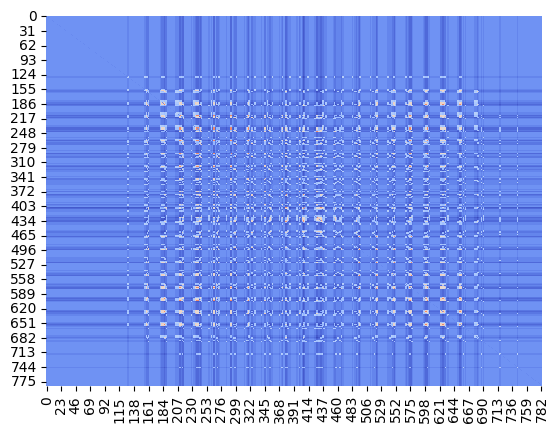

In [1]:
import mnist
import hopefield
fetch = mnist.fetch_minist_for_hopfield(size=5, error_rate=0.14)    
bias = 60
hopefield.save_mnist_prediction(fetch=fetch, bias=bias, sync=False)

WIZUALIZACJE

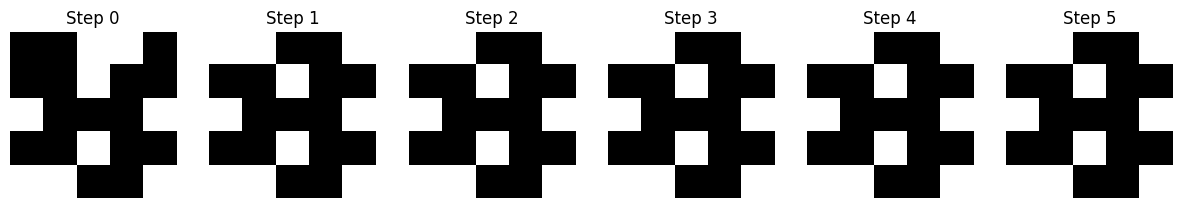

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Example binary patterns (e.g., 5x5 images)
patterns = np.array([
    [1, 1, -1, -1, 1,
     -1, -1, 1, -1, -1,
     1, -1, -1, -1, 1,
     -1, -1, 1, -1, -1,
     1, 1, -1, -1, 1],
    [-1, -1, 1, 1, -1,
     1, 1, -1, 1, 1,
     -1, 1, 1, 1, -1,
     1, 1, -1, 1, 1,
     -1, -1, 1, 1, -1]
])

# Hopfield network training
n_neurons = patterns.shape[1]
W = np.zeros((n_neurons, n_neurons))
for p in patterns:
    W += np.outer(p, p)
np.fill_diagonal(W, 0)

# Corrupt a pattern
test_pattern = patterns[0].copy()
test_pattern[:5] = -test_pattern[:5]  # Flip the first 5 bits

# Pattern recall process
states = [test_pattern]
for _ in range(5):
    new_state = states[-1].copy()
    for i in range(n_neurons):
        new_state[i] = 1 if np.dot(W[i], new_state) > 0 else -1
    states.append(new_state)

# Visualize pattern evolution
fig, axes = plt.subplots(1, len(states), figsize=(15, 3))
for i, state in enumerate(states):
    axes[i].imshow(state.reshape(5, 5), cmap="gray")
    axes[i].axis('off')
    axes[i].set_title(f"Step {i}")
plt.show()


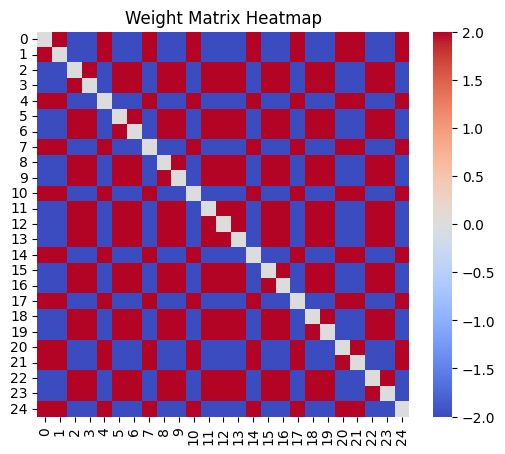

In [8]:
import seaborn as sns

# Visualize weight matrix
plt.figure(figsize=(6, 5))
sns.heatmap(W, annot=False, cmap="coolwarm", cbar=True)
plt.title("Weight Matrix Heatmap")
plt.show()


asasdasd

In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pandas as pd

In [19]:
def generate_random_data(size, num_frames):
    data_frames = []
    for _ in range(num_frames):
        data = np.random.rand(size, size)
        df = pd.DataFrame(data)
        data_frames.append(df)
    return data_frames

size = 10  # Size of the correlation matrix
num_frames = 50  # Number of frames in the animation
data_frames = generate_random_data(size, num_frames)

In [20]:
def init_heatmap():
    fig, ax = plt.subplots()
    sns.heatmap(data_frames[0], ax=ax, cbar=False, annot=False)
    return fig, ax

In [21]:
def update_heatmap(frame, ax):
    ax.clear()
    sns.heatmap(data_frames[frame], ax=ax, cbar=True, annot=True)

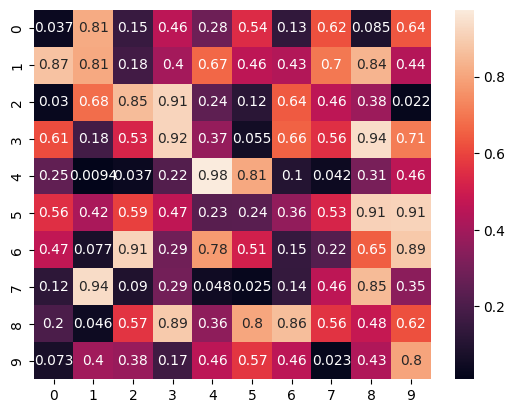

In [22]:
fig, ax = init_heatmap()
anim = FuncAnimation(fig, update_heatmap, frames=num_frames, fargs=(ax,), interval=200)

In [23]:
anim.save('animated_heatmap.gif', writer='Pillow')

MovieWriter Pillow unavailable; using Pillow instead.


sdfsdfsf

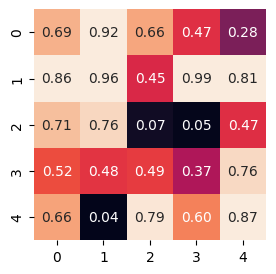

In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import animation

dimension = (5, 5)
fig, ax = plt.subplots(figsize=(3, 3))  # Reduce the figure size

# Create the heatmap with initial data
data = np.random.rand(*dimension)
heatmap = sns.heatmap(data, ax=ax, vmax=.8, cbar=False, annot=True, fmt=".2f")

def init():
    data = np.zeros(dimension)
    ax.clear()
    sns.heatmap(data, ax=ax, vmax=.8, cbar=False, annot=True, fmt=".2f")

# Define the animate function
def animate(i):
    data = np.random.rand(*dimension)
    ax.clear()
    sns.heatmap(data, ax=ax, vmax=.8, cbar=False, annot=True, fmt=".2f")
    return ax

# Create the animation
ani = animation.FuncAnimation(fig, animate, init_func=init, frames=20, repeat=False)
plt.show()

# Save the animation as a GIF with optimized parameters
ani.save('animated_heatmap.gif', writer='pillow', fps=2, dpi=80)